In [1]:
import os 
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

In [2]:
# Load and preprocess the data
def load_and_preprocess_data(data):
    images = []
    labels = []
    for label, image_paths in data.items():
        for path in image_paths:
            img = cv2.imread(str(path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
            img = cv2.resize(img, (224, 224))  # Resize image to VGG16 input size
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [3]:
# Load data
path = pathlib.Path(r"C:\Users\akshi\OneDrive\Desktop\gmu\ait 736\mid project\kvasir-dataset\kvasir-dataset")

In [4]:
dyed_ifted_polyps = list(path.glob('dyed-lifted-polyps/*'))
dyed_resection_margins = list(path.glob('dyed-resection-margins/*'))
esophagitis = list(path.glob('esophagitis/*'))
normal_cecum = list(path.glob('normal-cecum/*'))
normal_pylorus = list(path.glob('normal-pylorus/*'))
normal_z_line = list(path.glob('normal-z-line/*'))
polyps = list(path.glob('polyps/*'))
ulcerative_colitis = list(path.glob('ulcerative-colitis/*'))

In [5]:
data = {
    'dyed-lifted-polyps' : dyed_ifted_polyps ,
    'dyed-resection-margins' : dyed_resection_margins,
    'esophagitis' : esophagitis,
    'normal-cecum' : normal_cecum,
    'normal-pylorus' : normal_pylorus,
    'normal-z-line' : normal_z_line,
    'polyps' : polyps,
    'ulcerative-colitis' : ulcerative_colitis
}

polys_labels = {
    0:'dyed-lifted-polyps',
    1:'dyed-resection-margins',
    2:'esophagitis',
    3:'normal-cecum',
    4:'normal-pylorus',
    5:'normal-z-line',
    6:'polyps',
    7:'ulcerative-colitis'
}

In [6]:
images, labels = load_and_preprocess_data(data)

In [7]:
print(len(images))

4000


In [8]:
# Split the data into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [9]:
train_data_16 = vgg16_preprocess_input(train_data)
val_data_16 = vgg16_preprocess_input(val_data)
test_data_16 = vgg16_preprocess_input(test_data)

In [10]:
# Convert string labels to numerical labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [11]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Create the model
model_vgg16 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

In [12]:
# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history_vgg16 = model_vgg16.fit(train_data_16, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data, val_labels_encoded))

# Evaluate the model
test_loss, test_acc = model_vgg16.evaluate(test_data_16, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.4824 - loss: 20.2393 - val_accuracy: 0.4812 - val_loss: 2.6140
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 354s 4s/step - accuracy: 0.6629 - loss: 0.9438 - val_accuracy: 0.4500 - val_loss: 3.2242
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - accuracy: 0.7400 - loss: 0.8081 - val_accuracy: 0.4797 - val_loss: 4.6529
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 535s 7s/step - accuracy: 0.7867 - loss: 0.5876 - val_accuracy: 0.4891 - val_loss: 5.4891
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 363s 5s/step - accuracy: 0.8075 - loss: 0.5825 - val_accuracy: 0.4875 - val_loss: 4.9171
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.7809 - loss: 0.5826 - val_accuracy: 0.4953 - val_loss: 5.8198
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 370s 5s/step - accuracy: 0.7985 - loss: 0.5666 - val_accuracy: 0.4641 - val_loss: 7.6960
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 357s 4s/step - accuracy: 0.8171 - loss: 0.4719 - val_accuracy: 0.4750 - 

In [14]:
# Print model summary
model_vgg16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (32, 7, 7, 512)        │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 25088)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 256)              │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 8)                │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,989,210 (129.66 MB)

 Trainable params: 6,424,840 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,849,682 (49.02 MB)

In [15]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the number of folds for cross-validation
num_folds = 5

# Define your VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Define the number of classes
num_classes = 8  # Update with the number of classes in your dataset

# Define a function to create the VGG16 model
def create_vgg16_model():
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Perform cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = []

for fold, (train_index, val_index) in enumerate(skf.split(train_data, train_labels_encoded)):
    print(f"Fold {fold + 1}/{num_folds}")
    
    # Create VGG16 model
    model = create_vgg16_model()
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Preprocess training and validation data
    train_data_preprocessed = preprocess_input(train_data[train_index])
    val_data_preprocessed = preprocess_input(train_data[val_index])
    
    # Train the model
    model.fit(train_data_preprocessed, train_labels_encoded[train_index], epochs=10, batch_size=32, verbose=1,
              validation_data=(val_data_preprocessed, train_labels_encoded[val_index]))
    
    # Evaluate the model on validation data
    val_loss, val_acc = model.evaluate(val_data_preprocessed, train_labels_encoded[val_index], verbose=0)
    print(f"Validation Accuracy: {val_acc}")
    cv_scores.append(val_acc)

# Calculate and print the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print(f"Mean Cross-Validation Accuracy: {mean_cv_score}")

Fold 1/5
Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.4293 - loss: 24.5880 - val_accuracy: 0.6777 - val_loss: 0.7996
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 294s 5s/step - accuracy: 0.6153 - loss: 1.2109 - val_accuracy: 0.7227 - val_loss: 0.6560
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 290s 5s/step - accuracy: 0.6599 - loss: 0.9044 - val_accuracy: 0.7500 - val_loss: 0.6387
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 289s 5s/step - accuracy: 0.6807 - loss: 0.8575 - val_accuracy: 0.7266 - val_loss: 0.6347
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 301s 5s/step - accuracy: 0.6929 - loss: 0.8366 - val_accuracy: 0.7520 - val_loss: 0.6342
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 294s 5s/step - accuracy: 0.6921 - loss: 0.8142 - val_accuracy: 0.7559 - val_loss: 0.6117
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.7097 - loss: 0.7267 - val_accuracy: 0.7656 - val_loss: 0.5836
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 292s 5s/step - accuracy: 0.7238 - loss: 0.7222 - val_accuracy: 

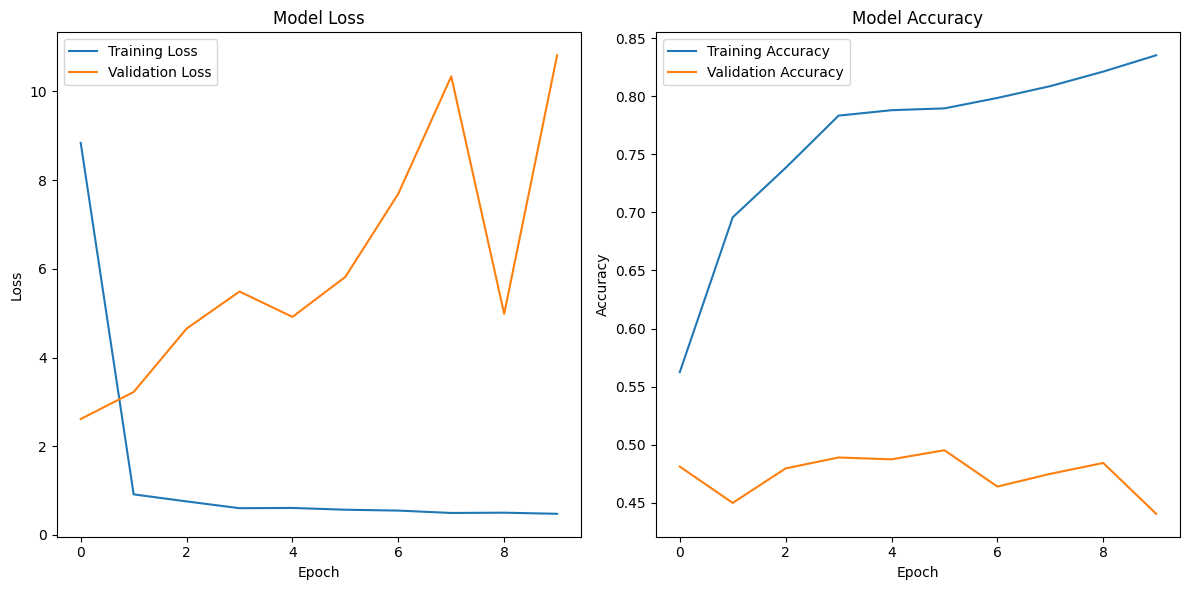

In [16]:
# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['loss'], label='Training Loss')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step


<Figure size 800x800 with 0 Axes>

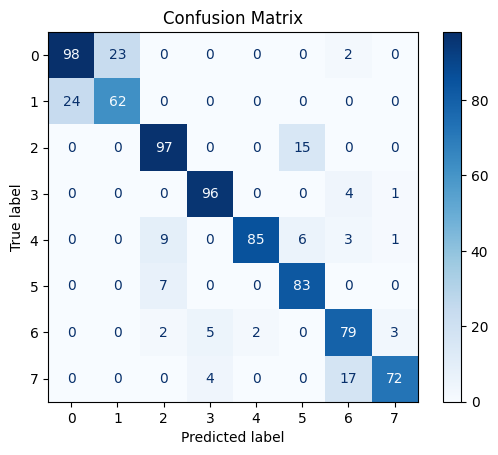

In [17]:
# Generate confusion matrix
predictions = model_vgg16.predict(test_data_16)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels_encoded, predicted_labels)
classes = [str(i) for i in range(8)]  # Assuming you have 8 classes

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score

# Compute Precision and Recall for multiclass classification
precision = precision_score(test_labels_encoded, predictions.argmax(axis=1), average='macro')
recall = recall_score(test_labels_encoded, predictions.argmax(axis=1), average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.8441235916451795
Recall: 0.8395125011453841


ROC AUC Score: 0.9811764244794556


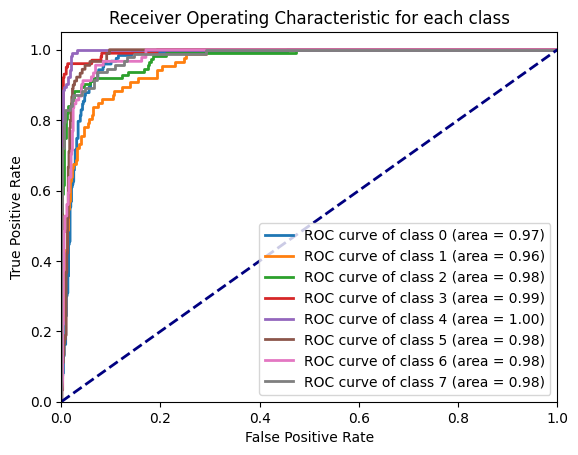

In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarize the true labels
y_test_binarized = label_binarize(test_labels_encoded, classes=np.unique(test_labels_encoded))

# Calculate AUC for each class
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')

print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

In [33]:
from keras.applications import VGG19

In [34]:
# Load the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

In [36]:
# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

In [37]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Train the model
history = model.fit(train_data, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data, val_labels_encoded))

Epoch 1/10
160/160 [==============================] - 699s 4s/step - loss: 5.5442 - accuracy: 0.5791 - val_loss: 0.6552 - val_accuracy: 0.7508
Epoch 2/10
160/160 [==============================] - 830s 5s/step - loss: 0.8469 - accuracy: 0.6889 - val_loss: 0.5208 - val_accuracy: 0.7922
Epoch 3/10
160/160 [==============================] - 832s 5s/step - loss: 0.8229 - accuracy: 0.6965 - val_loss: 0.5860 - val_accuracy: 0.7984
Epoch 4/10
160/160 [==============================] - 827s 5s/step - loss: 0.7744 - accuracy: 0.6965 - val_loss: 0.5308 - val_accuracy: 0.7953
Epoch 5/10
160/160 [==============================] - 826s 5s/step - loss: 0.6800 - accuracy: 0.7295 - val_loss: 0.5147 - val_accuracy: 0.8148
Epoch 6/10
160/160 [==============================] - 791s 5s/step - loss: 0.6785 - accuracy: 0.7355 - val_loss: 0.4691 - val_accuracy: 0.8328
Epoch 7/10
160/160 [==============================] - 836s 5s/step - loss: 0.5870 - accuracy: 0.7709 - val_loss: 0.4543 - val_accuracy: 0.8422

In [39]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

50/50 [==============================] - 216s 4s/step - loss: 0.5494 - accuracy: 0.8313
Test Accuracy: 0.831250011920929


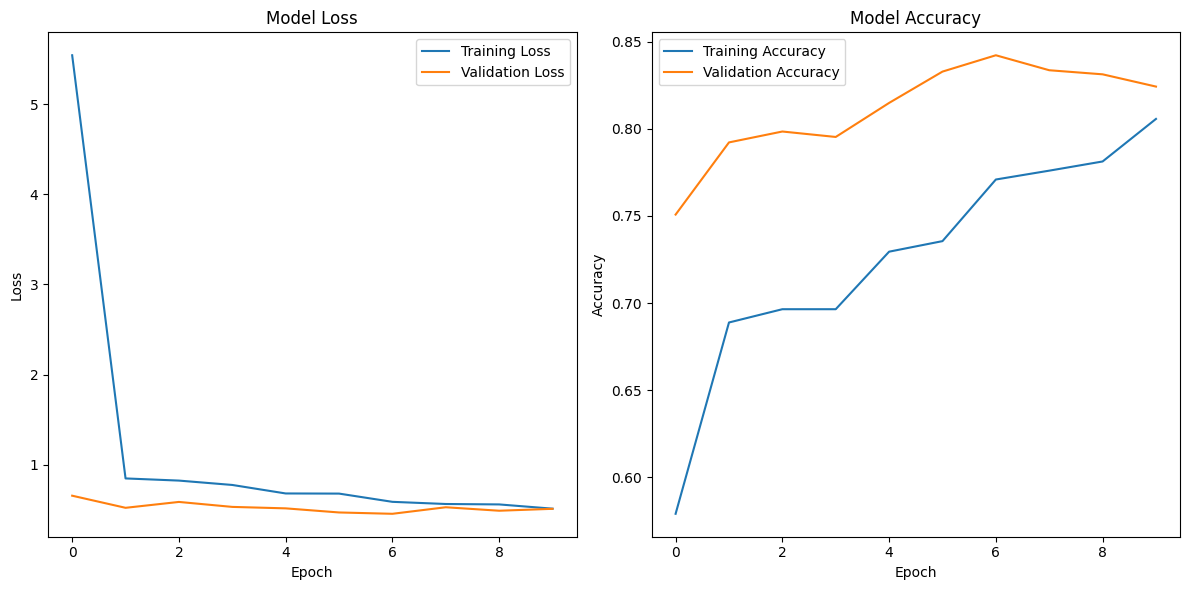

In [40]:
# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

50/50 [==============================] - 209s 4s/step


<Figure size 800x800 with 0 Axes>

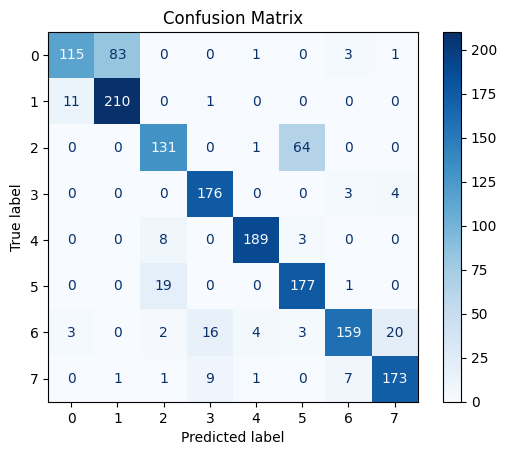

In [41]:
# Generate confusion matrix
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels_encoded, predicted_labels)
classes = [str(i) for i in range(8)]  # Assuming you have 8 classes

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [36]:
from keras.applications import ResNet50

In [37]:
# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Create the model
model_res = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

In [38]:
train_data_res = resnet_preprocess_input(train_data)
val_data_res = resnet_preprocess_input(val_data)
test_data_res = resnet_preprocess_input(test_data)

In [40]:
# Compile the model
model_res.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_res = model_res.fit(train_data_res, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data_res, val_labels_encoded))

Epoch 1/10
160/160 [==============================] - 320s 2s/step - loss: 5.1088 - accuracy: 0.6252 - val_loss: 0.6889 - val_accuracy: 0.7695
Epoch 2/10
160/160 [==============================] - 288s 2s/step - loss: 0.8034 - accuracy: 0.6994 - val_loss: 0.5179 - val_accuracy: 0.7859
Epoch 3/10
160/160 [==============================] - 287s 2s/step - loss: 0.7174 - accuracy: 0.7223 - val_loss: 0.5421 - val_accuracy: 0.8172
Epoch 4/10
160/160 [==============================] - 287s 2s/step - loss: 0.6717 - accuracy: 0.7328 - val_loss: 0.5507 - val_accuracy: 0.8352
Epoch 5/10
160/160 [==============================] - 288s 2s/step - loss: 0.6512 - accuracy: 0.7551 - val_loss: 0.5858 - val_accuracy: 0.8023
Epoch 6/10
160/160 [==============================] - 288s 2s/step - loss: 0.6108 - accuracy: 0.7650 - val_loss: 0.3889 - val_accuracy: 0.8422
Epoch 7/10
160/160 [==============================] - 288s 2s/step - loss: 0.5297 - accuracy: 0.7820 - val_loss: 0.4521 - val_accuracy: 0.8531

In [41]:
# Evaluate the model
test_loss, test_acc = model_res.evaluate(test_data_res, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

50/50 [==============================] - 65s 1s/step - loss: 0.4962 - accuracy: 0.8469
Test Accuracy: 0.846875011920929


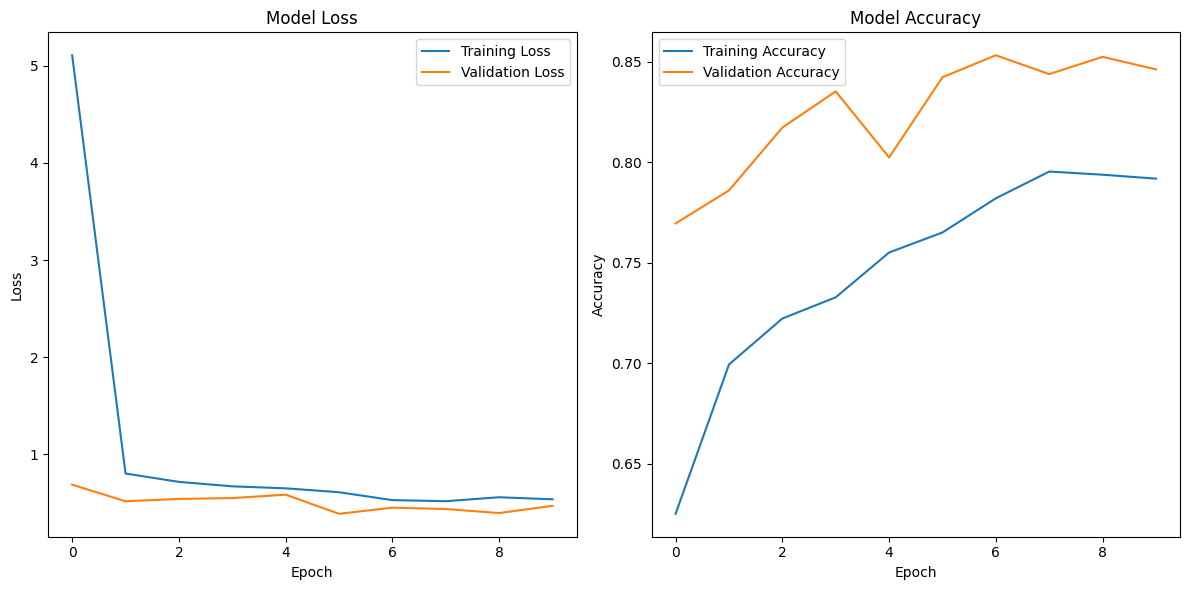

In [42]:
# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_res.history['loss'], label='Training Loss')
plt.plot(history_res.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_res.history['accuracy'], label='Training Accuracy')
plt.plot(history_res.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001D9B3523A60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001D9B3523A60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

<Figure size 800x800 with 0 Axes>

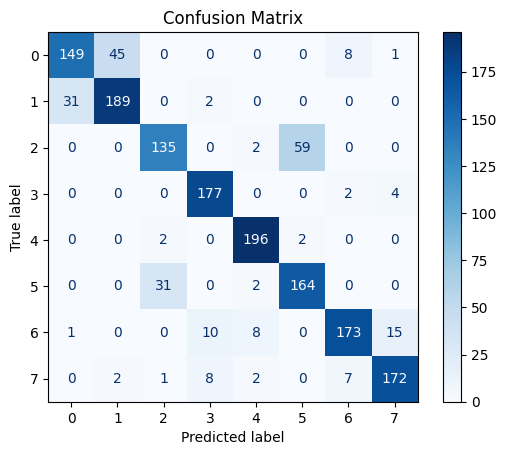

In [44]:
# Generate confusion matrix
predictions = model_res.predict(test_data_res)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels_encoded, predicted_labels)
classes = [str(i) for i in range(8)]  # Assuming you have 8 classes

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [48]:
from keras.applications import Xception

In [49]:
# Load the Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

83683744/83683744 [==============================] - 2s 0us/step


In [50]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data, val_labels_encoded))

Epoch 1/10
160/160 [==============================] - 299s 2s/step - loss: 15.8481 - accuracy: 0.2365 - val_loss: 1.6927 - val_accuracy: 0.3266
Epoch 2/10
160/160 [==============================] - 278s 2s/step - loss: 1.9370 - accuracy: 0.2336 - val_loss: 1.4581 - val_accuracy: 0.3641
Epoch 3/10
160/160 [==============================] - 277s 2s/step - loss: 1.8456 - accuracy: 0.2383 - val_loss: 1.6133 - val_accuracy: 0.2875
Epoch 4/10
160/160 [==============================] - 278s 2s/step - loss: 1.7882 - accuracy: 0.2492 - val_loss: 1.4784 - val_accuracy: 0.3352
Epoch 5/10
160/160 [==============================] - 282s 2s/step - loss: 1.7789 - accuracy: 0.2457 - val_loss: 1.3190 - val_accuracy: 0.4094
Epoch 6/10
160/160 [==============================] - 279s 2s/step - loss: 1.7055 - accuracy: 0.2631 - val_loss: 1.2399 - val_accuracy: 0.4000
Epoch 7/10
160/160 [==============================] - 278s 2s/step - loss: 1.6781 - accuracy: 0.2666 - val_loss: 1.1864 - val_accuracy: 0.416

In [51]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

50/50 [==============================] - 66s 1s/step - loss: 1.2179 - accuracy: 0.4119
Test Accuracy: 0.41187500953674316


In [13]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [15]:
# Load DenseNet121 model with pre-trained weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build your classification model on top of the pre-trained DenseNet model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

In [16]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Preprocess the data using DenseNet's preprocess_input function
train_data_densenet = densenet_preprocess_input(train_data)
val_data_densenet = densenet_preprocess_input(val_data)
test_data_densenet = densenet_preprocess_input(test_data)

In [17]:
# Train the model
history = model.fit(train_data_densenet, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data_densenet, val_labels_encoded))

Epoch 1/10


160/160 [==============================] - 249s 1s/step - loss: 0.8523 - accuracy: 0.6748 - val_loss: 0.4783 - val_accuracy: 0.8281
Epoch 2/10
160/160 [==============================] - 235s 1s/step - loss: 0.4797 - accuracy: 0.8107 - val_loss: 0.4168 - val_accuracy: 0.8328
Epoch 3/10
160/160 [==============================] - 233s 1s/step - loss: 0.4018 - accuracy: 0.8416 - val_loss: 0.3580 - val_accuracy: 0.8617
Epoch 4/10
160/160 [==============================] - 234s 1s/step - loss: 0.3795 - accuracy: 0.8477 - val_loss: 0.3516 - val_accuracy: 0.8672
Epoch 5/10
160/160 [==============================] - 231s 1s/step - loss: 0.3398 - accuracy: 0.8633 - val_loss: 0.3498 - val_accuracy: 0.8500
Epoch 6/10
160/160 [==============================] - 238s 1s/step - loss: 0.3146 - accuracy: 0.8727 - val_loss: 0.3310 - val_accuracy: 0.8664
Epoch 7/10
160/160 [==============================] - 239s 1s/step - loss: 0.3101 - accuracy: 0.8717 - val_loss: 0.3181 - val_accuracy: 0.86

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

50/50 [==============================] - 59s 1s/step - loss: 0.3496 - accuracy: 0.8606
Test Accuracy: 0.8606250286102295


In [19]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [20]:
# Load EfficientNetB0 model with pre-trained weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build your classification model on top of the pre-trained EfficientNetB0 model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

16705208/16705208 [==============================] - 4s 0us/step


In [21]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data, val_labels_encoded))

Epoch 1/10
160/160 [==============================] - 110s 605ms/step - loss: 1.8493 - accuracy: 0.2588 - val_loss: 1.6656 - val_accuracy: 0.3320
Epoch 2/10
160/160 [==============================] - 91s 568ms/step - loss: 1.6607 - accuracy: 0.3172 - val_loss: 1.5318 - val_accuracy: 0.4156
Epoch 3/10
160/160 [==============================] - 92s 578ms/step - loss: 1.5610 - accuracy: 0.3414 - val_loss: 1.4421 - val_accuracy: 0.3938
Epoch 4/10
160/160 [==============================] - 93s 585ms/step - loss: 1.5060 - accuracy: 0.3648 - val_loss: 1.3979 - val_accuracy: 0.4117
Epoch 5/10
160/160 [==============================] - 90s 564ms/step - loss: 1.4650 - accuracy: 0.3730 - val_loss: 1.3690 - val_accuracy: 0.4375
Epoch 6/10
160/160 [==============================] - 89s 558ms/step - loss: 1.4213 - accuracy: 0.4010 - val_loss: 1.3461 - val_accuracy: 0.4211
Epoch 7/10
160/160 [==============================] - 89s 559ms/step - loss: 1.4110 - accuracy: 0.3939 - val_loss: 1.3301 - val_a

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

50/50 [==============================] - 23s 454ms/step - loss: 1.3447 - accuracy: 0.4169
Test Accuracy: 0.4168750047683716


In [23]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [24]:
# Load MobileNet model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build your classification model on top of the pre-trained MobileNet model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

17225924/17225924 [==============================] - 4s 0us/step


In [25]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data, val_labels_encoded))

Epoch 1/10
160/160 [==============================] - 73s 420ms/step - loss: 0.8745 - accuracy: 0.6707 - val_loss: 0.4654 - val_accuracy: 0.8289
Epoch 2/10
160/160 [==============================] - 62s 389ms/step - loss: 0.5100 - accuracy: 0.7934 - val_loss: 0.4513 - val_accuracy: 0.8211
Epoch 3/10
160/160 [==============================] - 61s 384ms/step - loss: 0.4388 - accuracy: 0.8205 - val_loss: 0.3921 - val_accuracy: 0.8367
Epoch 4/10
160/160 [==============================] - 63s 394ms/step - loss: 0.4021 - accuracy: 0.8389 - val_loss: 0.3764 - val_accuracy: 0.8430
Epoch 5/10
160/160 [==============================] - 61s 382ms/step - loss: 0.3517 - accuracy: 0.8631 - val_loss: 0.3836 - val_accuracy: 0.8453
Epoch 6/10
160/160 [==============================] - 61s 383ms/step - loss: 0.3444 - accuracy: 0.8609 - val_loss: 0.3743 - val_accuracy: 0.8477
Epoch 7/10
160/160 [==============================] - 61s 385ms/step - loss: 0.3206 - accuracy: 0.8727 - val_loss: 0.3774 - val_ac

In [26]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

50/50 [==============================] - 17s 336ms/step - loss: 0.4088 - accuracy: 0.8388
Test Accuracy: 0.8387500047683716
